In [12]:
from preprocess import get_term, TERMS, print_keys

for term in TERMS:
    students = get_term(term)
    for student in students:
        print_keys(student)
        break
    break


sex [str]
passed [bool]
years_enrolled [int]
current_courses [list]
points_quiz [int]
points_assign [int]
points_checkmark [int]
points_unknown [int]
points_total [int]


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from preprocess import get_term, TERMS


for term in TERMS:
    students = get_term(term)

    sex = [s["sex"] for s in students] # "Male", "Female"
    passed = [int(s["passed"]) for s in students] # boolean -> target
    years_enrolled = [s["years_enrolled"] for s in students] # int
    course_load = [len(s["current_courses"]) for s in students] # int
    points_quiz = [s["points_quiz"] for s in students] # int
    points_assign = [s["points_assign"] for s in students] # int
    points_checkmark = [s["points_checkmark"] for s in students] # int
    points_unknown = [s["points_unknown"] for s in students] # int
    points_total = [s["points_total"] for s in students] # int

# visualize data

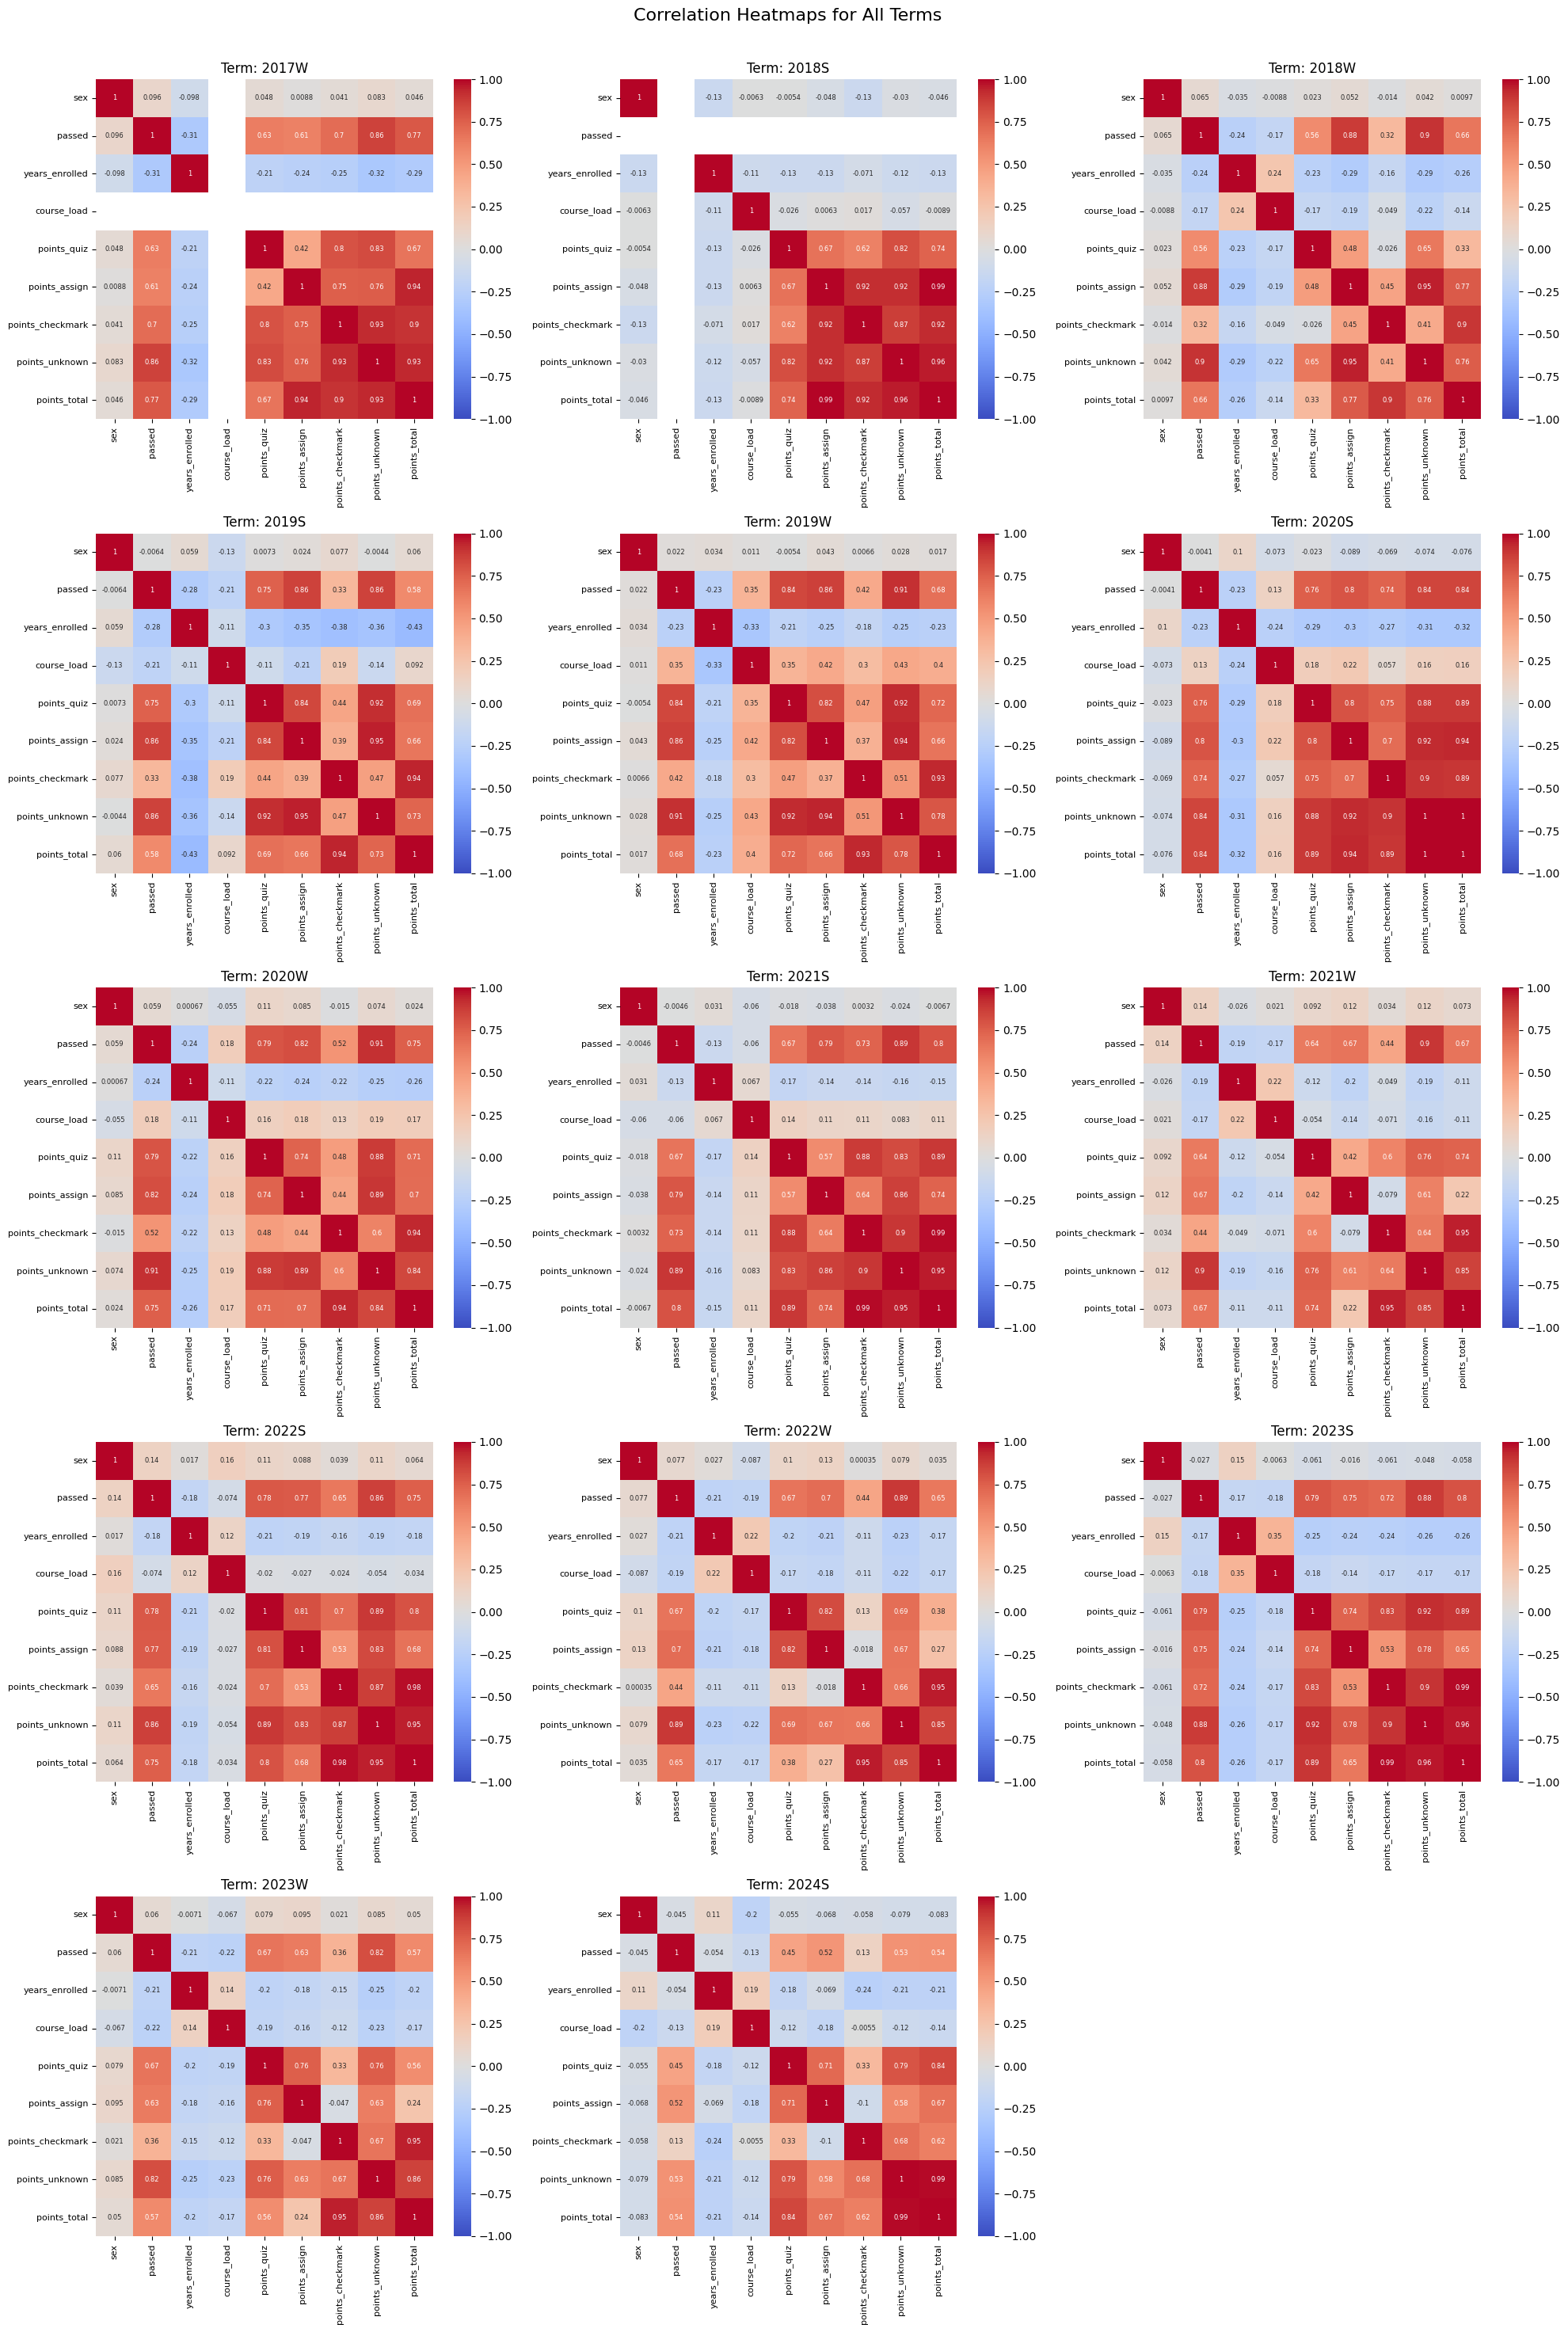

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from preprocess import get_term, TERMS

def create_correlation_heatmap(ax, term):
    students = get_term(term)
    
    df = pd.DataFrame({
        'sex': [1 if s["sex"] == "Male" else 0 for s in students],
        'passed': [int(s["passed"]) for s in students],
        'years_enrolled': [s["years_enrolled"] for s in students],
        'course_load': [len(s["current_courses"]) for s in students],
        'points_quiz': [s["points_quiz"] for s in students],
        'points_assign': [s["points_assign"] for s in students],
        'points_checkmark': [s["points_checkmark"] for s in students],
        'points_unknown': [s["points_unknown"] for s in students],
        'points_total': [s["points_total"] for s in students]
    })
    
    # drop all null, infinite, and NaN values
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    df = df.dropna()
    df = df.reset_index(drop=True)

    corr_matrix = df.corr()    
    sns.heatmap(corr_matrix, ax=ax, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, annot_kws={'size': 6})
    ax.set_title(f'Term: {term}')
    ax.tick_params(axis='both', which='major', labelsize=8)

n_terms = len(TERMS)
n_cols = 3  # update to increase/decrease the number of columns
n_rows = (n_terms + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
fig.suptitle('Correlation Heatmaps for All Terms', fontsize=16)
axes = axes.flatten()

for i, term in enumerate(TERMS):
    create_correlation_heatmap(axes[i], term)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # adjust to prevent title overlap
plt.show()

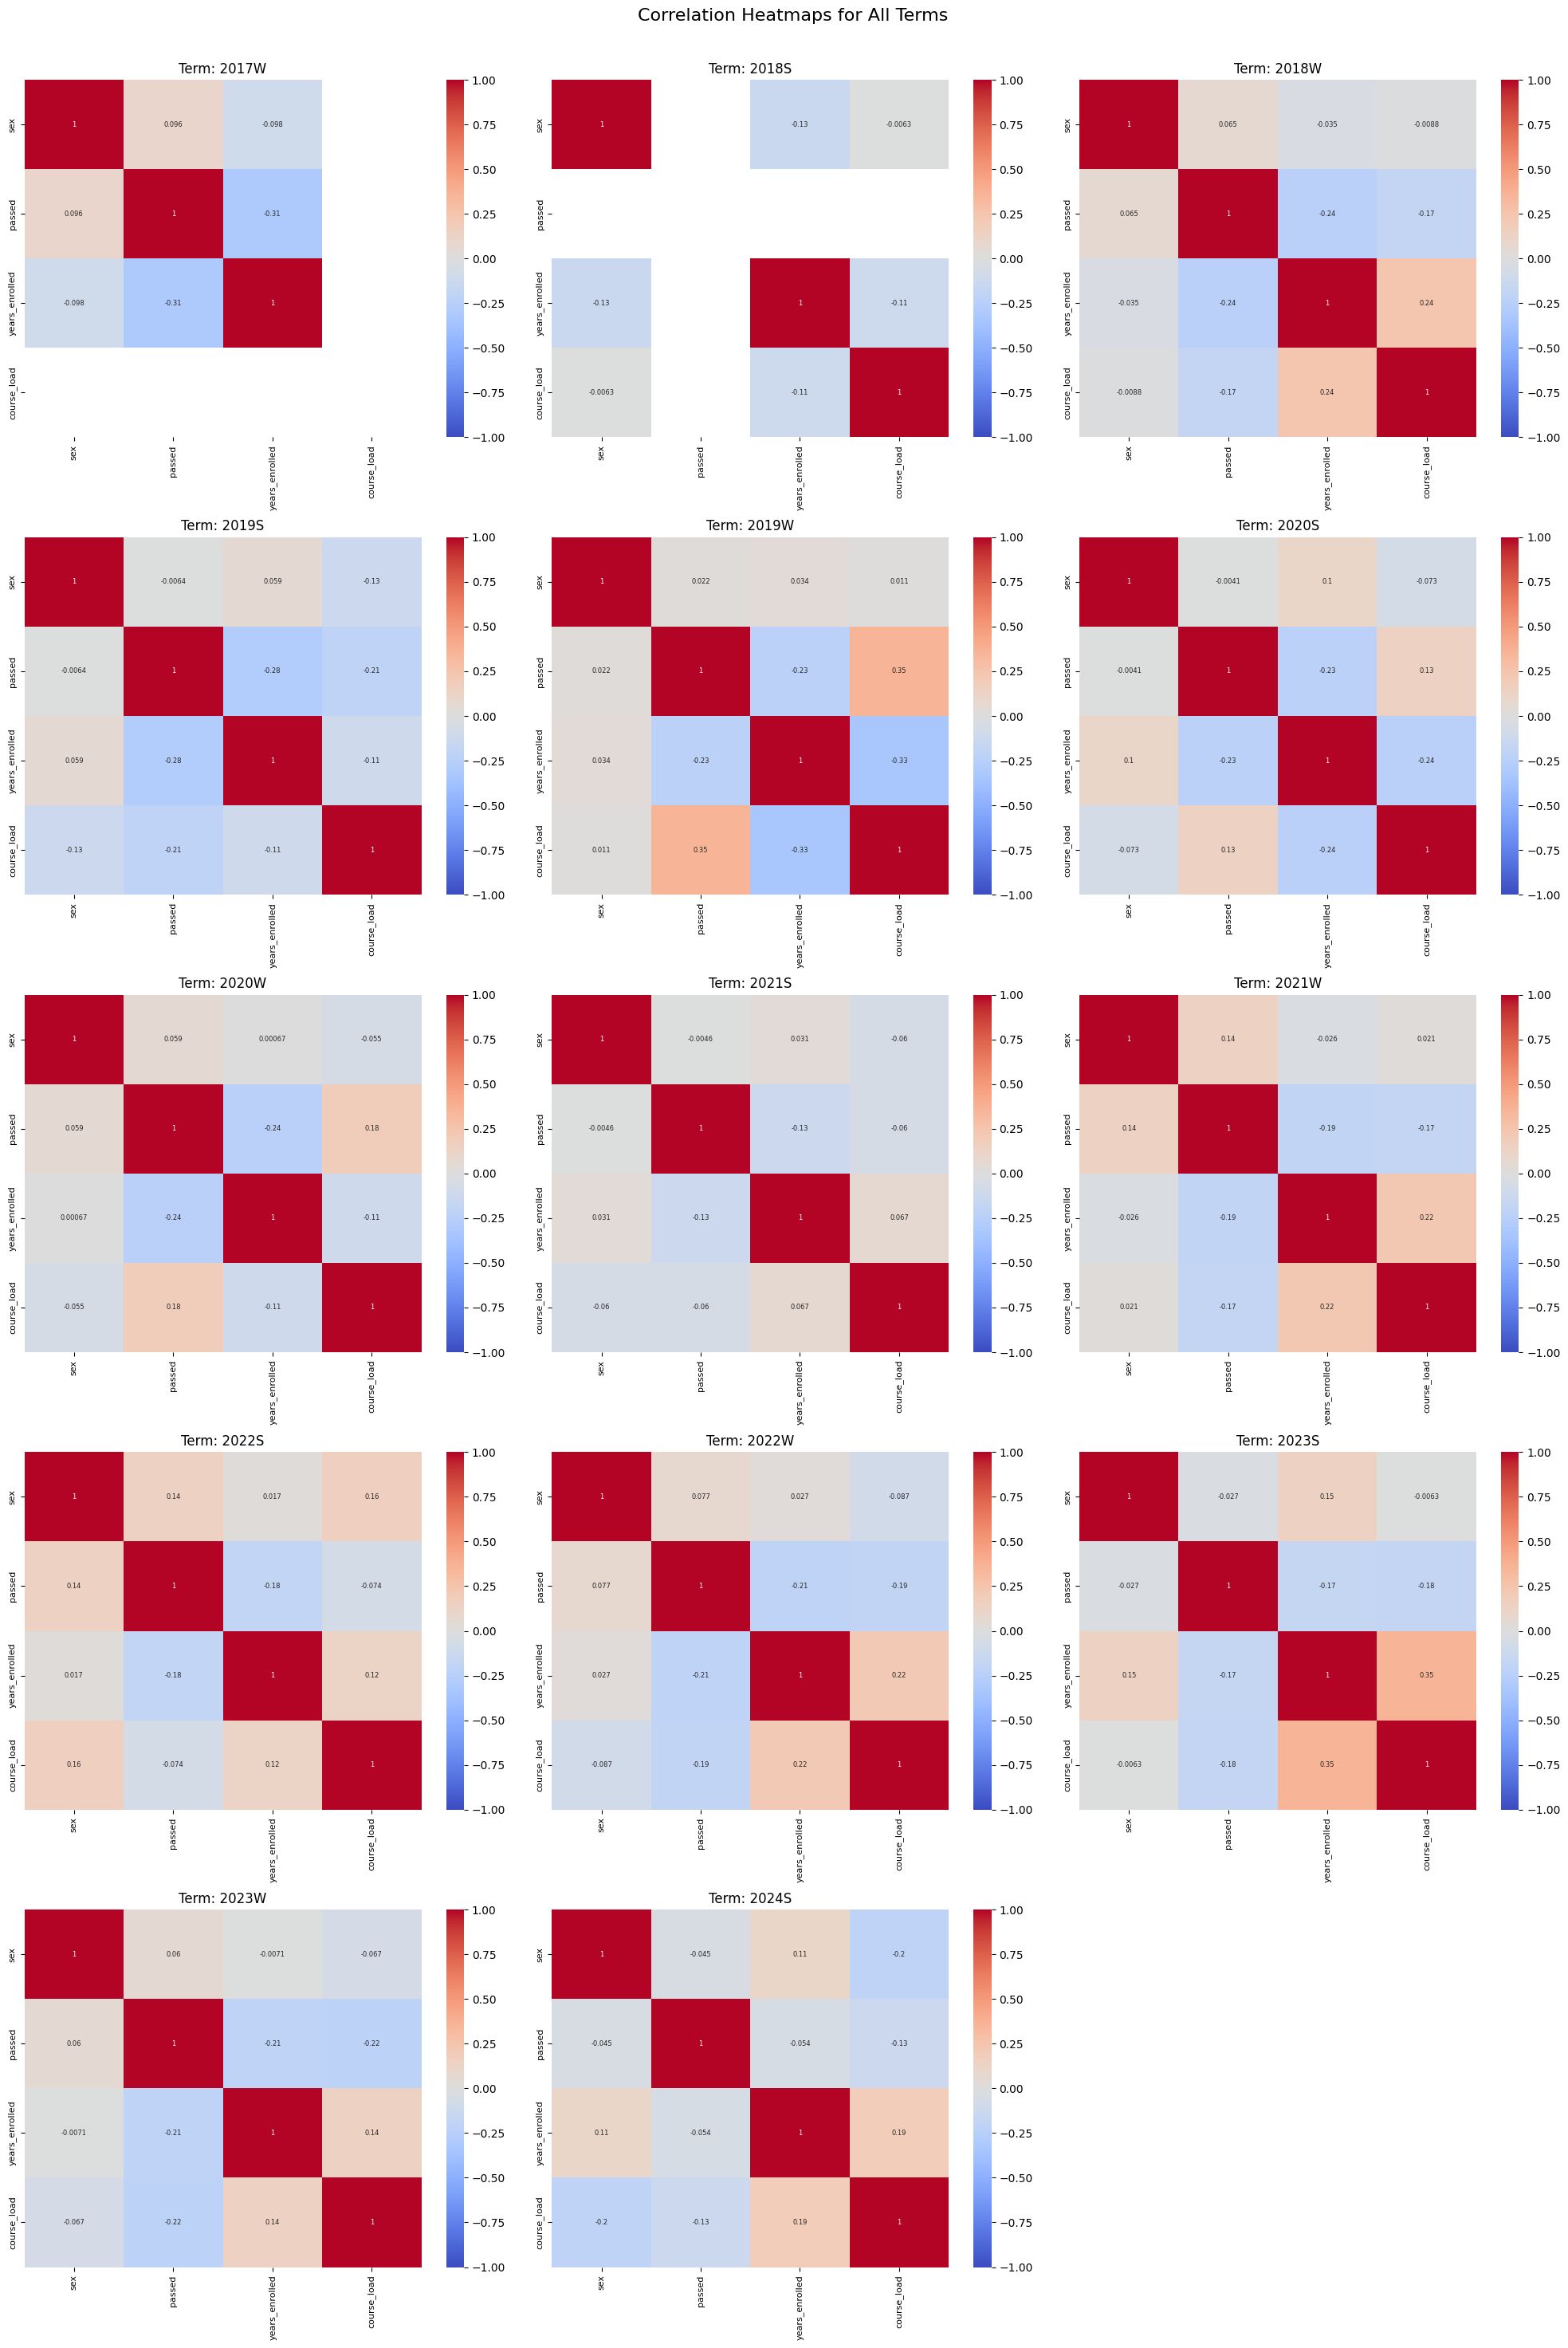

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from preprocess import get_term, TERMS

def create_correlation_heatmap(ax, term):
    students = get_term(term)
    
    df = pd.DataFrame({
        'sex': [1 if s["sex"] == "Male" else 0 for s in students],
        'passed': [int(s["passed"]) for s in students],
        'years_enrolled': [s["years_enrolled"] for s in students],
        'course_load': [len(s["current_courses"]) for s in students],
    })

    # drop all null, infinite, and NaN values
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    df = df.dropna()
    df = df.reset_index(drop=True)
    
    corr_matrix = df.corr()    
    sns.heatmap(corr_matrix, ax=ax, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, annot_kws={'size': 6})
    ax.set_title(f'Term: {term}')
    ax.tick_params(axis='both', which='major', labelsize=8)

n_terms = len(TERMS)
n_cols = 3  # update to increase/decrease the number of columns
n_rows = (n_terms + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
fig.suptitle('Correlation Heatmaps for All Terms', fontsize=16)
axes = axes.flatten()

for i, term in enumerate(TERMS):
    create_correlation_heatmap(axes[i], term)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # adjust to prevent title overlap
plt.show()

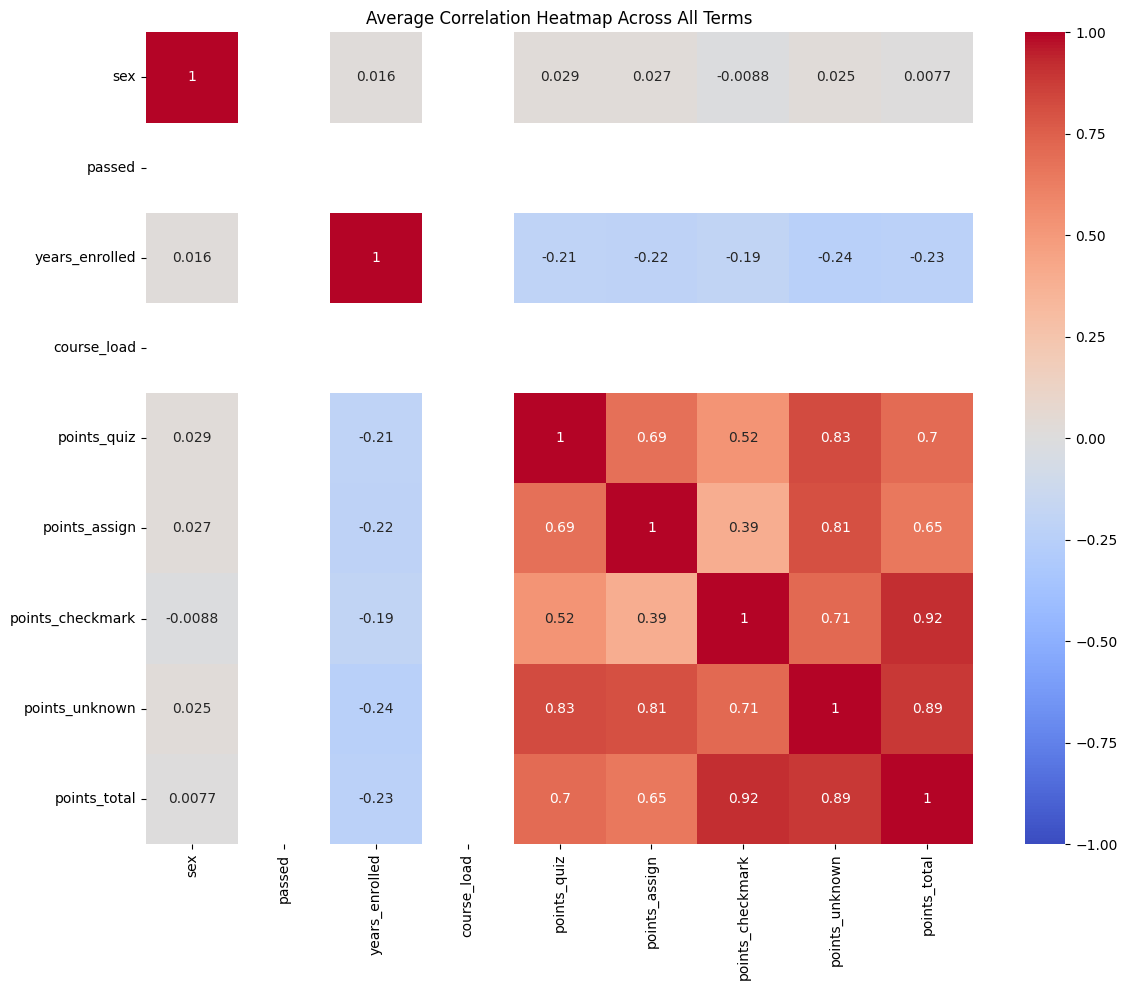

In [25]:
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from preprocess import get_term, TERMS

def create_average_correlation_heatmap():
    corr_matrices = []

    for term in TERMS:
        students = get_term(term)
        df = pd.DataFrame({
            'sex': [1 if s["sex"] == "Male" else 0 for s in students],
            'passed': [int(s["passed"]) for s in students],
            'years_enrolled': [s["years_enrolled"] for s in students],
            'course_load': [len(s["current_courses"]) for s in students],
            'points_quiz': [s["points_quiz"] for s in students],
            'points_assign': [s["points_assign"] for s in students],
            'points_checkmark': [s["points_checkmark"] for s in students],
            'points_unknown': [s["points_unknown"] for s in students],
            'points_total': [s["points_total"] for s in students]
        })

        corr_matrix = df.corr()
        corr_matrices.append(corr_matrix)

    average_corr_matrix = sum(corr_matrices) / len(corr_matrices)
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(average_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Average Correlation Heatmap Across All Terms')
    plt.tight_layout()
    plt.show()

create_average_correlation_heatmap()



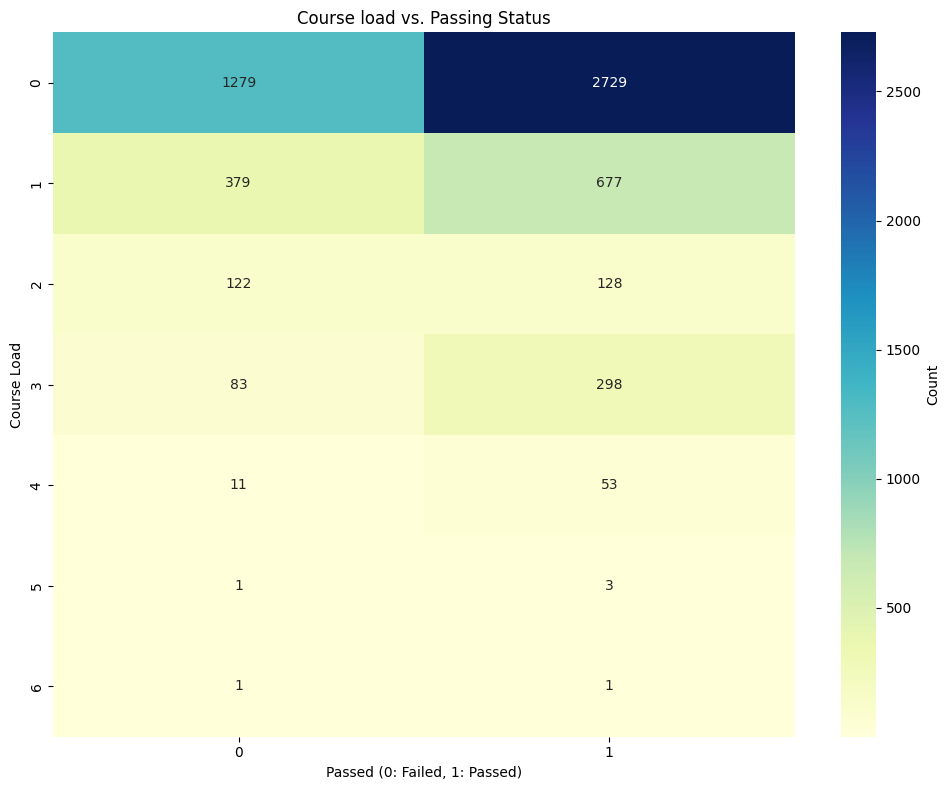

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from preprocess import get_term

data = []

for term in TERMS:
    students = get_term(term)
    passed = [int(s["passed"]) for s in students]
    course_load = [len(s["current_courses"]) for s in students]
    data.extend(list(zip(passed, course_load)))

df = pd.DataFrame(data, columns=['Passed', 'Course Load'])

contingency = pd.crosstab(df['Course Load'], df['Passed'])

plt.figure(figsize=(10, 8))
sns.heatmap(contingency, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'})

plt.title('Course load vs. Passing Status')
plt.xlabel('Passed (0: Failed, 1: Passed)')
plt.ylabel('Course Load')

plt.tight_layout()
plt.show()

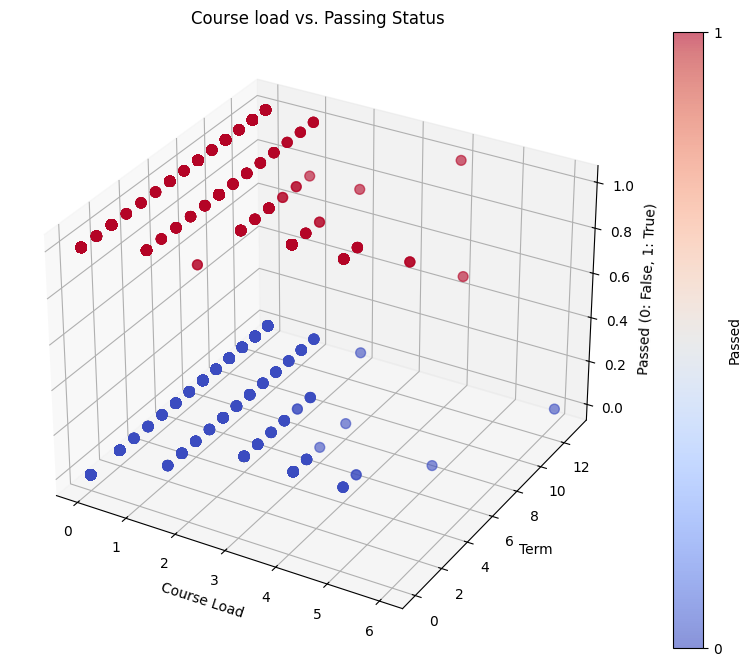

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from preprocess import get_term

all_passed = []
all_course_load = []
all_terms = []

for i, term in enumerate(TERMS):
    students = get_term(term)
    passed = [int(s["passed"]) for s in students]
    course_load = [len(s["current_courses"]) for s in students]
    
    all_passed.extend(passed)
    all_course_load.extend(course_load)
    all_terms.extend([i] * len(students))

df = pd.DataFrame({
    'Passed': all_passed,
    'Course Load': all_course_load,
    'Term': all_terms
})

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Course Load'], df['Term'], df['Passed'], c=df['Passed'], cmap='coolwarm', s=50, alpha=0.6)

ax.set_xlabel('Course Load')
ax.set_ylabel('Term')
ax.set_zlabel('Passed (0: False, 1: True)')
ax.set_title('Course load vs. Passing Status')

plt.colorbar(scatter, label='Passed', ticks=[0, 1])
plt.show()

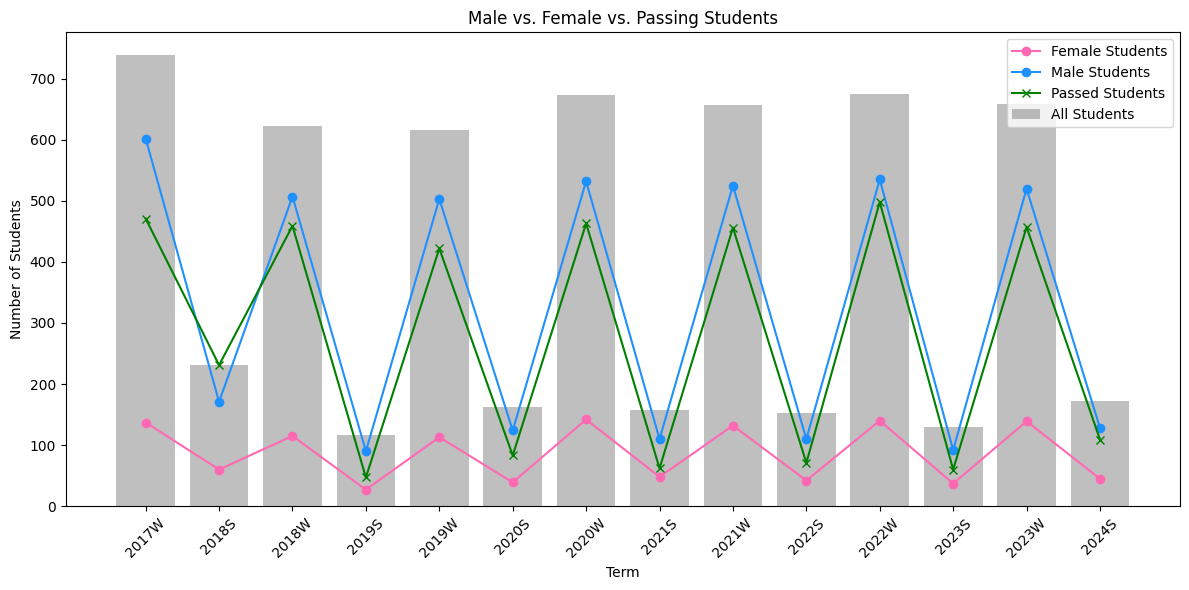

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from preprocess import get_term, TERMS, print_keys, print_json


all_data = []

for term in TERMS:
    students = get_term(term)
    passed = [s["passed"] for s in students]
    sex = [s["sex"] for s in students]
    
    term_data = {
        'Term': term,
        'Total': len(students),
        'Female': sum(1 for s in sex if s == "Female"),
        'Male': sum(1 for s in sex if s == "Male"),
        'Passed': sum(passed)
    }
    all_data.append(term_data)

df = pd.DataFrame(all_data)


plt.figure(figsize=(12, 6))

plt.bar(df['Term'], df['Total'], alpha=0.5, label='All Students', color='gray')
plt.plot(df['Term'], df['Female'], marker='o', label='Female Students', color='#FF69B4')
plt.plot(df['Term'], df['Male'], marker='o', label='Male Students', color='#1E90FF')
plt.plot(df['Term'], df['Passed'], marker='x', label='Passed Students', color='green')


plt.title('Male vs. Female vs. Passing Students')
plt.xlabel('Term')
plt.ylabel('Number of Students')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

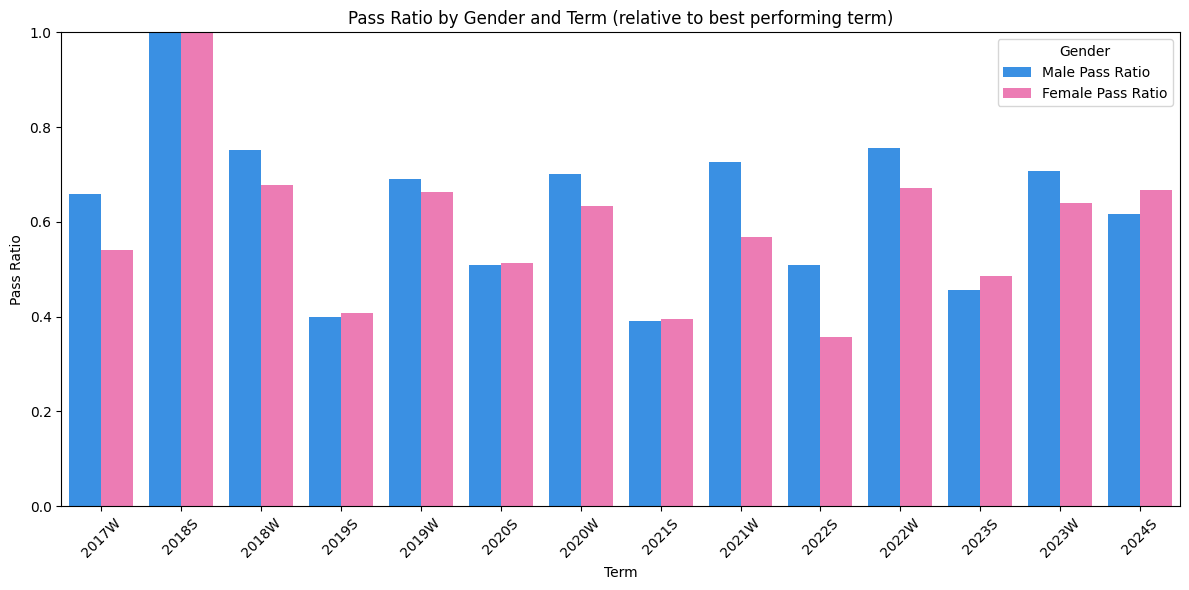

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from preprocess import get_term, TERMS, print_keys, print_json

all_data = []

for term in TERMS:
    students = get_term(term)
    courses = [(s["passed"], s["sex"]) for s in students]
    
    male_passes = sum(1 for passed, sex in courses if passed and sex == "Male")
    female_passes = sum(1 for passed, sex in courses if passed and sex == "Female")
    male_total = sum(1 for _, sex in courses if sex == "Male")
    female_total = sum(1 for _, sex in courses if sex == "Female")
    
    male_ratio = male_passes / male_total if male_total > 0 else 0
    female_ratio = female_passes / female_total if female_total > 0 else 0
    
    all_data.append({
        'Term': term,
        'Male Pass Ratio': male_ratio,
        'Female Pass Ratio': female_ratio
    })

df = pd.DataFrame(all_data)
df_melted = df.melt(id_vars=['Term'], var_name='Gender', value_name='Pass Ratio')
custom_palette = {"Male Pass Ratio": "#1E90FF", "Female Pass Ratio": "#FF69B4"}

plt.figure(figsize=(12, 6))
sns.barplot(x='Term', y='Pass Ratio', hue='Gender', data=df_melted, palette=custom_palette)

plt.title('Pass Ratio by Gender and Term (relative to best performing term)')
plt.xlabel('Term')
plt.ylabel('Pass Ratio')
plt.ylim(0, 1)
plt.legend(title='Gender')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

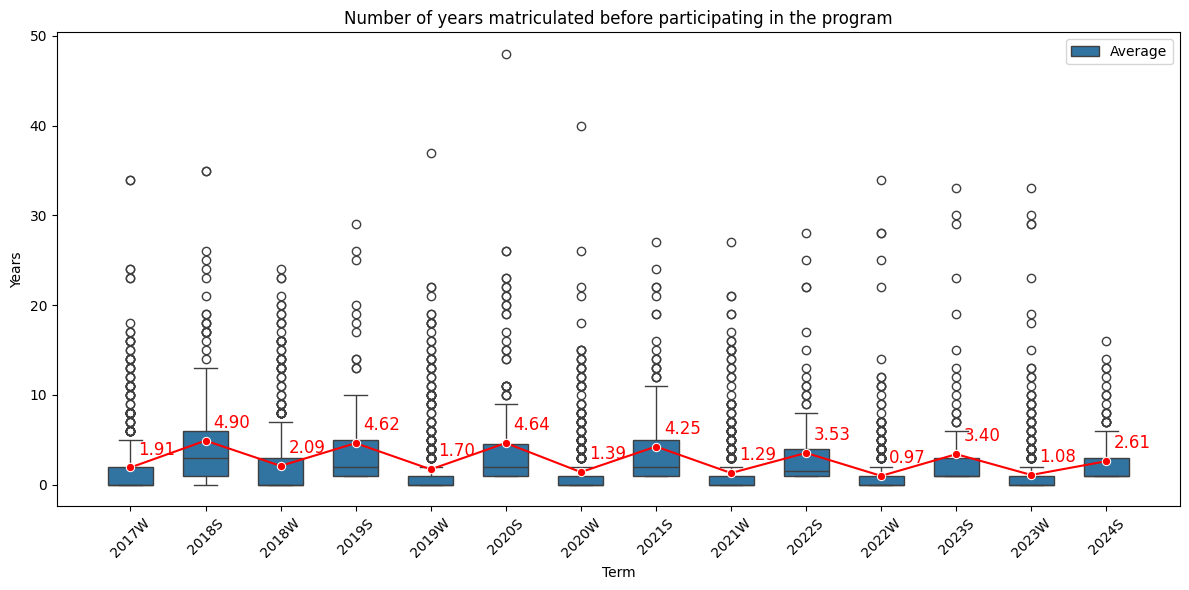

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from preprocess import get_term, TERMS, print_keys, print_json

all_data = []

for term in TERMS:
    students = get_term(term)
    term_year = int(term[0:4])
    years_enrolled = [s["years_enrolled"] for s in students]
    
    all_data.extend([(term, d) for d in years_enrolled])

df = pd.DataFrame(all_data, columns=['Term', 'Years_Enrolled'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Term', y='Years_Enrolled', data=df, width=0.6)
averages = df.groupby('Term')['Years_Enrolled'].mean()

# add a label to the average line
for i, avg in enumerate(averages):
    plt.text(i + 0.35, avg + 1, f'{avg:.2f}', ha='center', va='bottom', fontsize=12, color='red')

sns.lineplot(x=averages.index, y=averages.values, color='red', marker='o')

plt.title('Number of years matriculated before participating in the program')
plt.xlabel('Term')
plt.ylabel('Years')
plt.legend(['Average'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

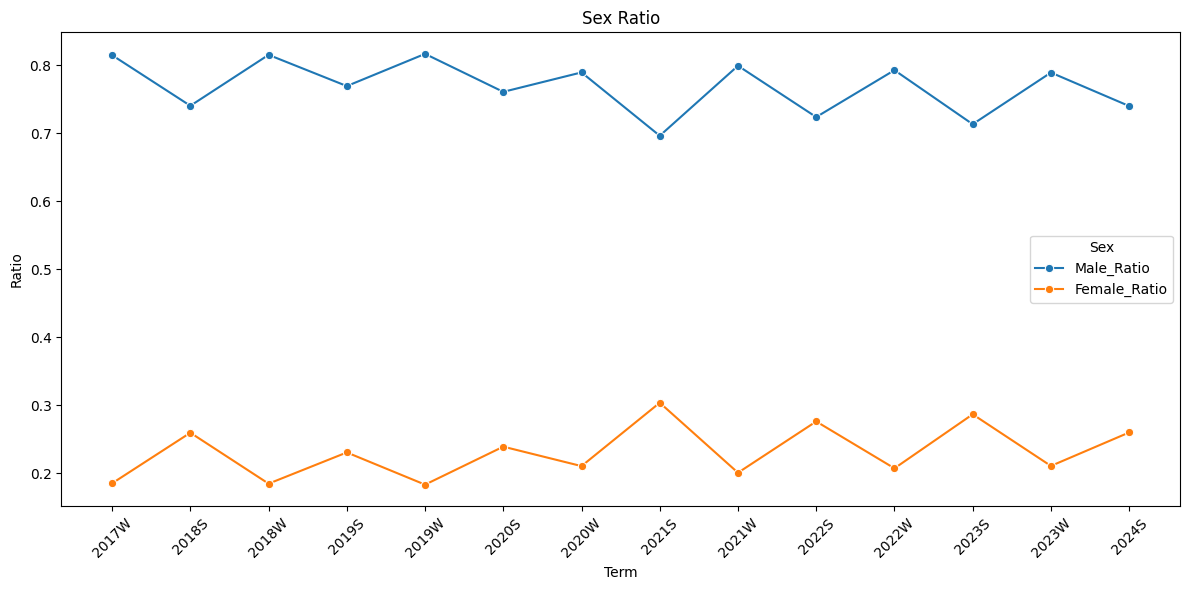

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from preprocess import get_term, TERMS, print_keys, print_json

terms_list = []
male_counts = []
female_counts = []

for term in TERMS:
    students = get_term(term)
    sexes = [s["sex"] for s in students]
    
    male_count = sexes.count("Male")
    female_count = sexes.count("Female")
    
    terms_list.append(term)
    male_counts.append(male_count)
    female_counts.append(female_count)

df = pd.DataFrame({
    'Term': terms_list,
    'Male': male_counts,
    'Female': female_counts
})

df['Male_Ratio'] = df['Male'] / (df['Male'] + df['Female'])
df['Female_Ratio'] = df['Female'] / (df['Male'] + df['Female'])

df_melted = pd.melt(df, id_vars=['Term'], value_vars=['Male_Ratio', 'Female_Ratio'], var_name='Sex', value_name='Ratio')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Term', y='Ratio', hue='Sex', marker='o')

plt.title('Sex Ratio')
plt.xlabel('Term')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.legend(title='Sex')

plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
import plotly.graph_objects as go

def create_parallel_coordinates():
    all_data = []
    for term in TERMS:
        term_data = get_term(term)
        for student in term_data:
            student['term'] = term
            all_data.append(student)
    
    df = pd.DataFrame(all_data)
    df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
    df['passed'] = df['passed'].astype(int)
    df['course_load'] = df['current_courses'].apply(len)

    fig = go.Figure(data=
        go.Parcoords(
            line = dict(color = df['points_total'],
                        colorscale = 'Viridis',
                        showscale = True),
            dimensions = list([
                dict(range = [0, 1],
                     label = 'Sex', values = df['sex']),
                dict(range = [0, 1],
                     label = 'Passed', values = df['passed']),
                dict(range = [df['years_enrolled'].min(), df['years_enrolled'].max()],
                     label = 'Years Enrolled', values = df['years_enrolled']),
                dict(range = [df['course_load'].min(), df['course_load'].max()],
                     label = 'Course Load', values = df['course_load']),
                # dict(range = [df['points_quiz'].min(), df['points_quiz'].max()],
                #      label = 'Quiz Points', values = df['points_quiz']),
                # dict(range = [df['points_assign'].min(), df['points_assign'].max()],
                #      label = 'Assignment Points', values = df['points_assign']),
                # dict(range = [df['points_checkmark'].min(), df['points_checkmark'].max()],
                #      label = 'Checkmark Points', values = df['points_checkmark']),
                # dict(range = [df['points_unknown'].min(), df['points_unknown'].max()],
                #      label = 'Unknown Points', values = df['points_unknown']),
                # dict(range = [df['points_total'].min(), df['points_total'].max()],
                #      label = 'Total Points', values = df['points_total'])
            ])
        )
    )
    fig.update_layout(title_text="Parallel Coordinates Plot of Student Performance")
    fig.show()

create_parallel_coordinates()

In [40]:
import plotly.express as px
import pandas as pd

def create_3d_scatter():
    all_data = []
    for term in TERMS:
        term_data = get_term(term)
        for student in term_data:
            all_data.append({
                'Term': term,
                'Sex': student['sex'],
                'Years Enrolled': student['years_enrolled'],
                'Quiz Points': student['points_quiz'],
                'Assignment Points': student['points_assign'],
                'Total Points': student['points_total'],
                'Passed': 'Yes' if student['passed'] else 'No'
            })
    
    df = pd.DataFrame(all_data)
    
    fig = px.scatter_3d(df, 
                        x='Quiz Points', 
                        y='Assignment Points', 
                        z='Years Enrolled',
                        color='Sex', 
                        symbol='Passed', 
                        size='Total Points',
                        hover_name='Term', 
                        opacity=0.7,
                        title="3D Visualization of Student Performance")
    
    fig.show()

create_3d_scatter()